### Regression

The regression is one of the fundamental techniques that will help us to find answer to questions such as 'how many'and 'how much' (continues numbers) by studying the relationship between the different variables that are relevant to the questions that we are trying to answer. 

Let’s consider a use case where we have collected students average test grade scores and their respective average studied hours for the test for group of similar IQ students. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Let's plot grades obtained vs hours studied 

   Hours_Studied  Test_Grade
0              2          57
1              3          66
2              4          73
3              5          76
4              6          79
5              7          81
6              8          90
7              9          96
8             10         100


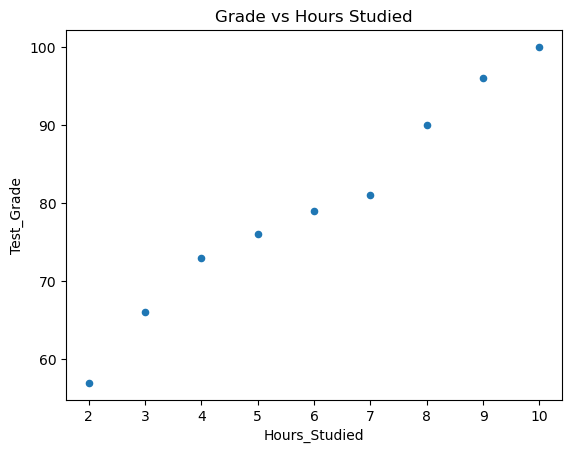

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.987797
Test_Grade          0.987797    1.000000


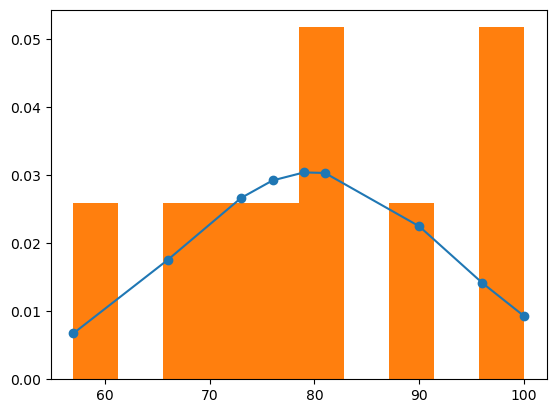

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df = pd.read_csv('Data/Grade_Set_1.csv')
print(df)

df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

print("Correlation Matrix: ")
print(df.corr())

fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))
plt.plot(df.Test_Grade, fit, '-o')
plt.hist(df.Test_Grade, density=True)
plt.show()

Intercept:  49.67777777777776
Coefficient:  [5.01666667]
Manual prediction : 80.7485207083
Using predict function:  [79.77777778]


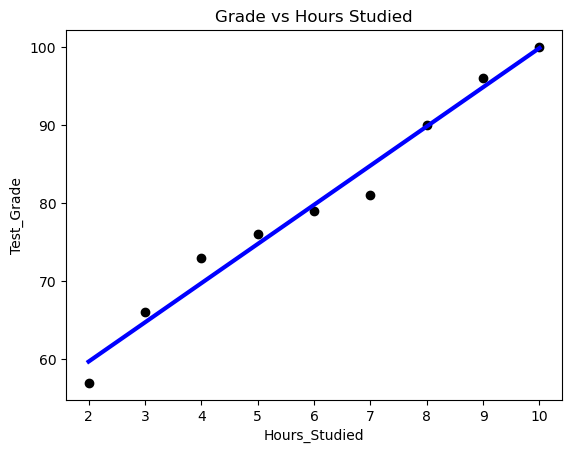

In [3]:
import sklearn.linear_model as lm
import numpy as np
import matplotlib.pyplot as plt

# Create linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied.values[:, np.newaxis]  # independent variable
y = df.Test_Grade.values                    # dependent variable

# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

# manual prediction for a given value of x
print("Manual prediction :", 52.2928994083 + 4.74260355 * 6)

# predict using the built-in function
# Note: predict expects a 2D array, so we use [[6]]
print("Using predict function: ", lr.predict([[6]]))

# plotting fitted line
plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

In [4]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df['Test_Grade_Pred'] = lr.predict(x)

df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())

print(df)
df.to_csv('r-squared.csv', index=False)

print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

print("R Squared using built-in function: ", r2_score(df.Test_Grade, df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

Sum of SSR: 1510.0166666666673
Sum of SST: 1547.5555555555557
   Hours_Studied  Test_Grade  Test_Grade_Pred         SST         SSR
0              2          57        59.711111  518.827160  402.671111
1              3          66        64.727778  189.827160  226.502500
2              4          73        69.744444   45.938272  100.667778
3              5          76        74.761111   14.271605   25.166944
4              6          79        79.777778    0.604938    0.000000
5              7          81        84.794444    1.493827   25.166944
6              8          90        89.811111  104.493827  100.667778
7              9          96        94.827778  263.160494  226.502500
8             10         100        99.844444  408.938272  402.671111
R Squared using manual calculation:  0.9757431074095351
R Squared using built-in function:  0.9757431074095347
Mean Absolute Error:  1.618518518518523
Root Mean Squared Error:  2.0422995995497297


### Outliers

Lets introduce a outlier i.e., a student has studied 5 hours and scored 100. Assume that this student is some higher IQ than others in this group. Notice the drop in R-squared value. So it is important to apply business logic to avoid including outliers in the training data set to generalize the model and increase accuracy

Intercept:  54.4022988505747
Coefficient:  [4.64367816]
Manual prdiction : 82.26436781609195
Using predict function:  [82.26436782]


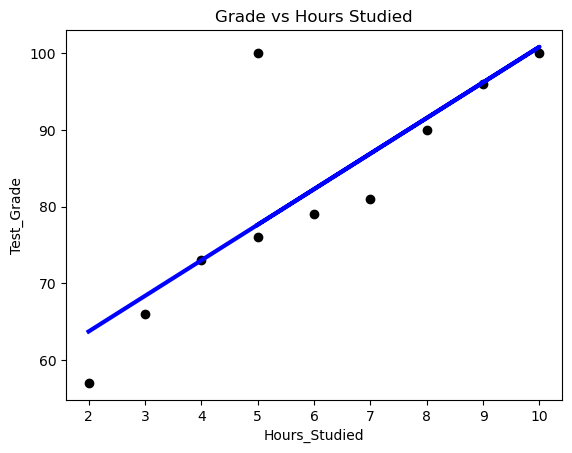

R Squared :  0.6855461390206965
Mean Absolute Error:  4.480459770114941
Root Mean Squared Error:  7.761235830020588


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv('Data/Grade_Set_1.csv')

df.loc[9] = np.array([5, 100])

x = df.Hours_Studied.values.reshape(-1, 1)
y = df.Test_Grade.values

lr = LinearRegression()
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

print("Manual prdiction :", lr.intercept_ + lr.coef_[0] * 6)

print("Using predict function: ", lr.predict([[6]]))

plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

df['Test_Grade_Pred'] = lr.predict(x)

print("R Squared : ", r2_score(df.Test_Grade, df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

# Polynomial

It is a form higher order linear regression modeled between dependent and independent variables as an nth degree polynomial.

    Hours_Studied  Test_Grade
0             0.5          20
1             1.0          21
2             2.0          22
3             3.0          23
4             4.0          25
5             5.0          37
6             6.0          48
7             7.0          56
8             8.0          67
9             9.0          76
10           10.0          90
11           11.0          89
12           12.0          90


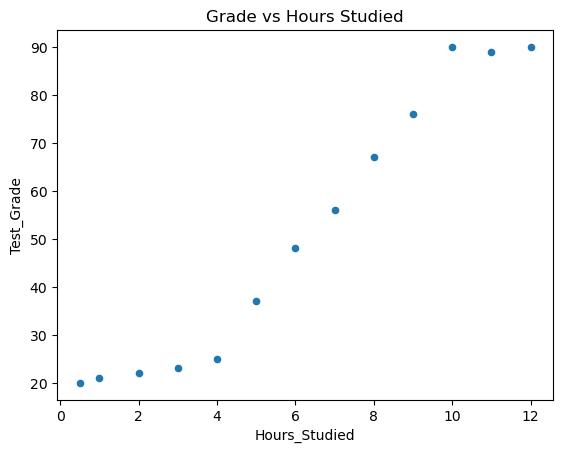

Correlation Matrix: 
               Hours_Studied  Test_Grade
Hours_Studied       1.000000    0.974868
Test_Grade          0.974868    1.000000


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Data/Grade_Set_2.csv')
print(df)

df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()

print("Correlation Matrix: ")
print(df.corr())

Intercept:  7.27106067219556
Coefficient:  [7.25447403]
Manual prediction : 50.797904845045835
Using predict function:  [50.79790485]


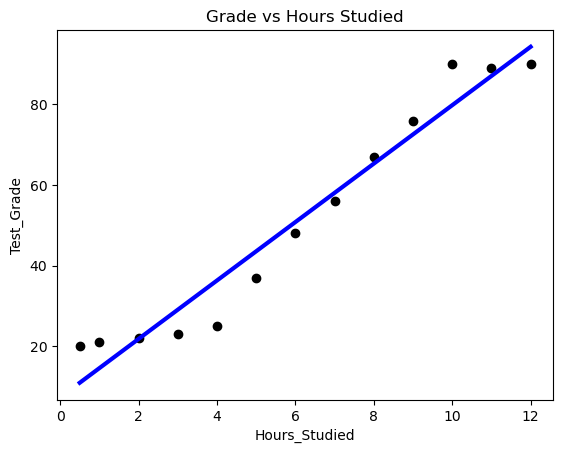

R Squared:  0.9503677766997879


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
from sklearn.metrics import r2_score

lr = lm.LinearRegression()

x = df.Hours_Studied.values.reshape(-1, 1)
y = df.Test_Grade.values

lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

print("Manual prediction :", lr.intercept_ + lr.coef_[0] * 6)

print("Using predict function: ", lr.predict([[6]]))

plt.scatter(x, y, color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

print("R Squared: ", r2_score(y, lr.predict(x)))

NumPy's vander function will return powers of the input vector

R-squared for degree 1 =  0.9503677766997879
R-squared for degree 2 =  0.9608726568678714
R-squared for degree 3 =  0.9938323120374665
R-squared for degree 4 =  0.9955000184096712
R-squared for degree 5 =  0.9956204913897357


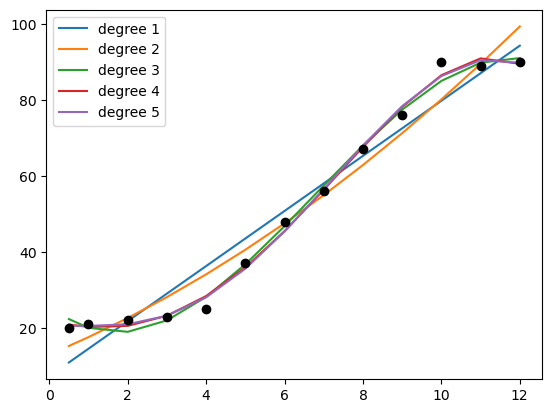

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

x = df.Hours_Studied
y = df.Test_Grade

for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))

plt.plot(x, y, 'ok')
plt.show()

sklearn provides a function to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

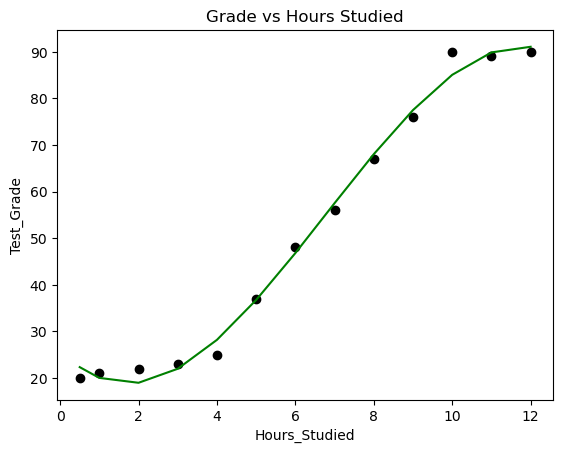

R Squared using built-in function:  0.9938323120374665


In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

x = df.Hours_Studied.values.reshape(-1, 1)
y = df.Test_Grade.values

degree = 3
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(x, y)

plt.scatter(x, y, color='black')

x_plot = np.sort(x, axis=0)
plt.plot(x_plot, model.predict(x_plot), color='green')

plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')
plt.show()

print("R Squared using built-in function: ", r2_score(y, model.predict(x)))

In [10]:
x = np.linspace(-3,3,1000)

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')

# tidy layout
plt.tight_layout()